In [10]:
from netCDF4 import Dataset
import numpy as np
import pickle
import matplotlib.pyplot as plt
from ll_xy import lonlat_to_xy
import cartopy
import cartopy.crs as ccrs

In [8]:
d = Dataset('Beaufort_mask/mask.nc')
d

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    origin: Mask from Changes in Arctic melt season and implications for sea ice loss, J. C. Stroeve  T. Markus  L. Boisvert  J. Miller and A. Barrett
    regions: {'Lakes': 0, 'Oceans': 1, 'Okhotsk': 2, 'Bering': 3, 'Hudson': 4, 'St Lawrence': 5, 'Baffin': 6, 'Greenland': 7, 'Barents': 8, 'Kara': 9, 'Laptev': 10, 'East Siberian': 11, 'Chukchi': 12, 'Beaufort': 13, 'Canadian Archipelago': 14, 'Central Arctic': 15, 'Land': 20, 'Coast': 21}
    dimensions(sizes): x(361), y(361)
    variables(dimensions): float64 mask_values(x, y), float32 lon(x, y), float32 lat(x, y)
    groups: 

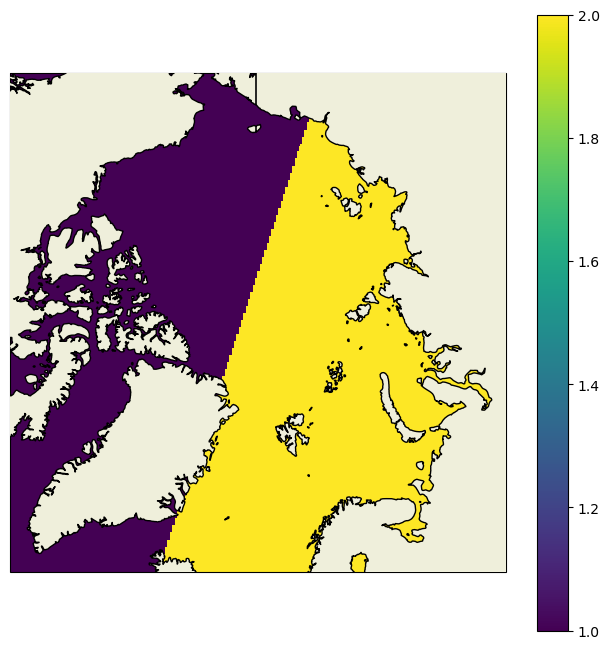

In [9]:
figs,ax=plt.subplots(1,1,figsize=(8,8),subplot_kw={'projection':ccrs.NorthPolarStereo()})


ax.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=5)

ax.set_extent([-180, 180, 90, 66], ccrs.PlateCarree())

lon = np.array(d['lon'])
lat = np.array(d['lat'])

x,y= lonlat_to_xy(lon,
                  lat,
                  hemisphere='n')

mask_vals = np.array(d['mask_values'])
mask_vals[:,:]=1

mask_vals[(3*x-y)+0.5e6>0]=2


m = ax.pcolormesh(lon,
                  lat,
               mask_vals,
                 transform=ccrs.PlateCarree(),
                 # label=station,
                 )

plt.colorbar(m)

pickle.dump((mask_vals,lon,lat),open('Beaufort_mask/tpd_mask.p','wb'))